# Part II - Ford GoBike Analysis for Feburary 2019
## by Judith Uba





## Investigation Overview


> For this analysis, I wanted to see how the long rides lasted for and factors that made a rider ride longer than others. I looked at the main feature of interest duration_sec and other features that affected it which included date, member_gender, user_type and date and age.  


## Dataset Overview

> The data set contained information about individual rides made in Ford GoBike, a bike-sharing system covering the greater San Francisco Bay area, for the month of Feburary in the year 2019. I will like to state here that I manipulated the dataset to get age and date features



In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#copy of dataframe
bike = data.copy()

In [4]:
#convert type from object to integer and Nan to 0
bike['member_birth_year'] = bike['member_birth_year'].fillna(0).astype(int)
#generate age column
bike["age"] = bike["member_birth_year"].apply(lambda x: 2019 - x if x > 0 else 0)

In [7]:
#extracting date of the month
bike['date'] = bike['start_time'].map(lambda x: x[:10])
bike['date'] = bike['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
#selecting date from datetime
bike['date'] = bike['date'].map(lambda x: x.day)

In [8]:
# drop Nans
biketrip = bike.dropna()

In [9]:
#selecting necessary columns
biketrip = biketrip[['duration_sec', 'bike_id', 'user_type', 'age',  'member_gender', 'date', 'bike_share_for_all_trip']]

## Distribution of Duration_sec

> Duration_sec is the main feature of interest as it showed how long each ride lasted. I plotted a histogram to see the distribution of this feature. From the plot, it is obvious that duration sec distribution is unimodal having a peak around 600 seconds

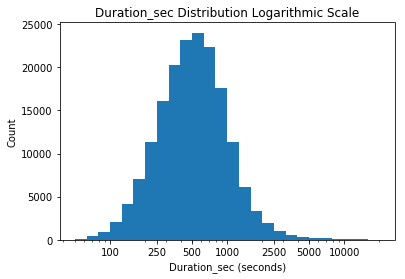

In [10]:
cut = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
plt.hist(data=biketrip, x='duration_sec', bins=cut)
plt.xscale('log')
plt.xticks([100, 250, 500, 1000, 2500, 5000, 10000],[100,250, 500, 1000, 2500,5000, 10000] )
plt.xlabel('Duration_sec (seconds)')
plt.ylabel('Count')
plt.title('Duration_sec Distribution Logarithmic Scale');

## Distribution of member_gender and user_type

> I looked at the relationship between the two categorical features, the member_gender snd the user_type to see how it was distributed. I plotted a multiple bar chart to visualize this information and get better insights. The member_gender includes Male, Female and Others while the user_type includes Customer and Subscribers.The Male riders have the highest population of the member_gender while the subscribers have the highest count when comapared to the customers. All the member_gender categories are either customers or subscribers

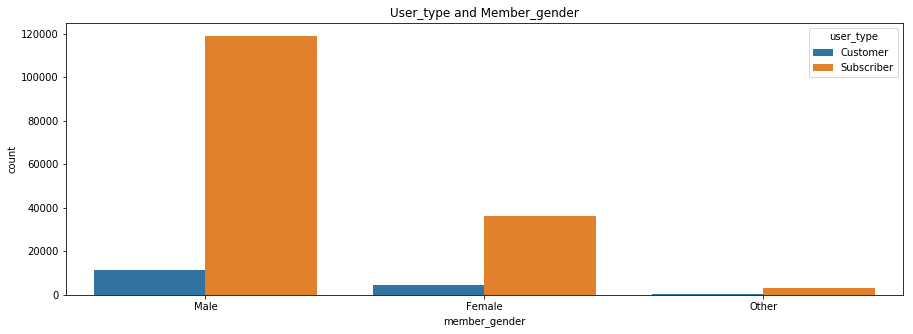

In [11]:
# bar chart
#ordering chart
plt.figure(figsize=[15, 5])
desc = biketrip['member_gender'].value_counts().index
sb.countplot(data = biketrip, x = 'member_gender', hue = 'user_type', order=desc)
plt.title('User_type and Member_gender');

## Which day had the most rides?

> I looked at the date feature to get a clearer insight on how rides were distributed through out the month of feburary. I created a barchart and arranged it in descending order to show the days with the highest number of rides and lowest number of rides. On the 28th of feburary, 2019 the higest number of rides were taken, while on the 9th of feburary, 2019 the least number of rides were taken



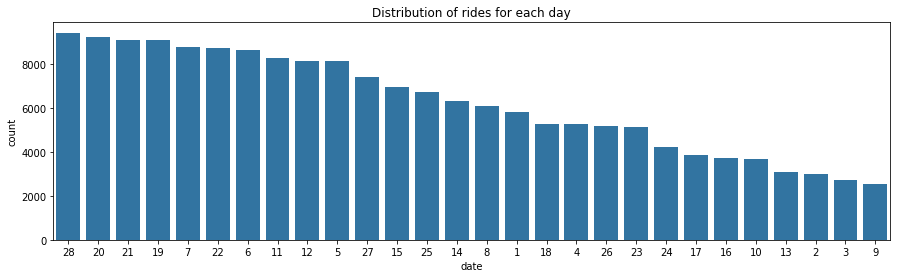

In [12]:
#bar chart to show distribution of rides across the days
plt.figure(figsize=[15, 4])
desc = biketrip['date'].value_counts().index
blue = sb.color_palette()[0]
sb.countplot(data=biketrip, x='date', color=blue, order= desc)
plt.title('Distribution of rides for each day');

In [13]:
#Cleaning outliers
Q25 = biketrip['duration_sec'].quantile(0.25)
Q75= biketrip['duration_sec'].quantile(0.75)
diff = Q75 - Q25
# detect extereme values
Q1 = (biketrip['duration_sec'] > (Q75 + 1.5 * diff))
extereme = biketrip['duration_sec'][~Q1].max()
#replace with mean 
biketrip['duration_sec'] = np.where(biketrip['duration_sec']> extereme, biketrip['duration_sec'].mean() , biketrip['duration_sec'])

## Which category of member_gender and user_type took longer rides?

> To get a better understanding of the category of both member_gender and user_tyoe that took longer rides, I generated a piont plot for a multivariate exploration of the three features. From the point plot, I gathered that the female customers (female riders that are customers) took the longest rides while the male subscribers took the shortest rides

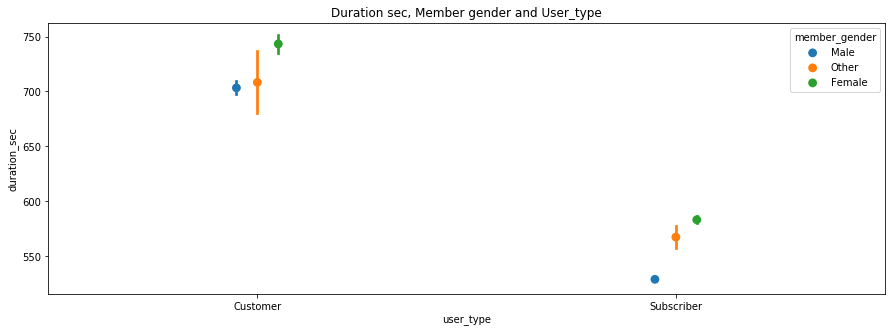

In [14]:
#point plot
plt.figure(figsize=[15, 5])
ax = sb.pointplot(data = biketrip, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
                  dodge = 0.1, linestyles = "")
plt.title('Duration sec, Member gender and User_type');

## Does sharing bike increase duration of rides?

> To know if bike sharing increased the duartion of rides and if all the user_type category shared bikes, I plotted the three features on a point plot. I found out that bike sharing was only exclusive to subscribers and subscribers that share bike took the shortest rides

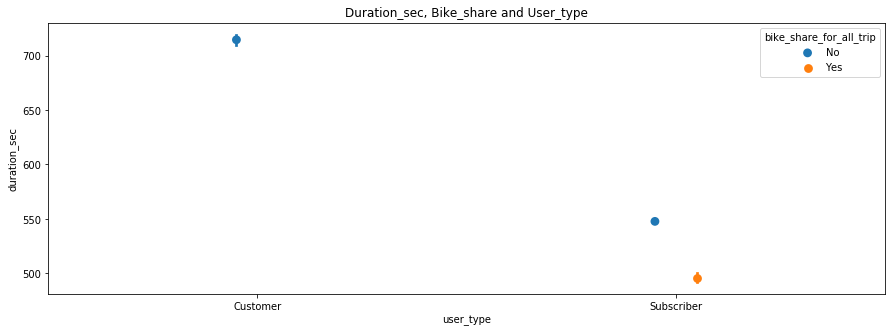

In [15]:
#generate pointplot
plt.figure(figsize=[15, 5])
ax = sb.pointplot(data = biketrip, x = 'user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip',
                  dodge = 0.1, linestyles = "")
plt.title('Duration_sec, Bike_share and User_type');

## Conclusion

> The female customers took the longest rides which I believe will result to more revenue for ford bike system. I think the company should target the female market more for more patronage. Secondly since the customers are taking more rides that the subscribers, they should be allowed to share rides too

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 363318 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/